# **PROJECT OVERVIEW**
This project aims to predict whether a loan application will be approved or not based on various personal and financial characteristics of the applicants.  
**STEPS USED IN THIS PROJECT**
- Dataset with **614 entries** across **13 columns** including demographic and financial features.
- Filled **missing values** using mode or mean.
- Adjusted **Dependents** category (replaced '3+' with '3').
- **Histograms** for Loan Amount distribution.
- **Count plots** for Loan Approval counts.
- Implemented **label encoding** for categorical features.
- Converted **Loan_Status** to a binary format.
- Split data into **training (80%)** and **testing (20%)** sets.
- Standard **scaling** applied to income-related features.
- Trained four classifiers: **Random Forest, Naive Bayes, Decision Tree, K-Nearest Neighbors**.
- Achieved accuracy scores between **40% to 60%**.   

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [104]:

# Loading dataset
from google.colab import files
uploaded = files.upload()


Saving Copy of loan.xlsx to Copy of loan (5).xlsx


In [105]:
df = pd.read_excel('Copy of loan.xlsx')
print(df.head())



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [107]:
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [108]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [109]:
df['Loan_Amount_Log'] = np.log1p(df['LoanAmount'])
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_Log'] = np.log1p(df['Total_Income'])


In [110]:
df['Dependents'] = df['Dependents'].str.replace('3+', '3')
df['Dependents'].isnull().sum()

563

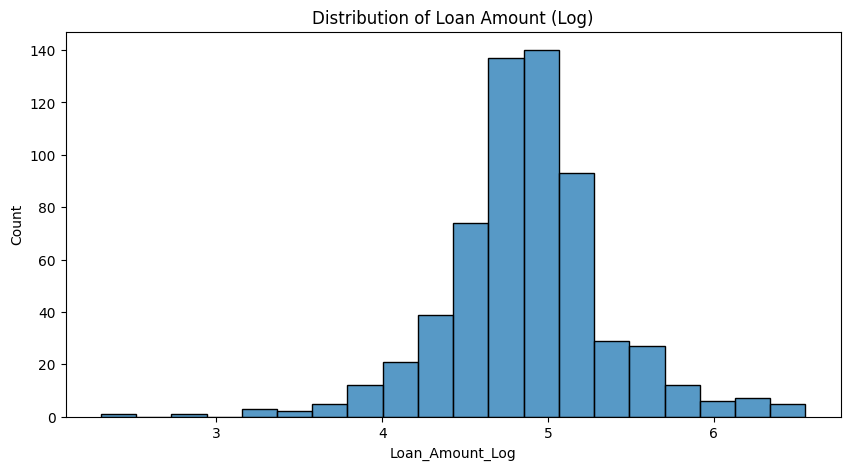

In [111]:
plt.figure(figsize=(10,5))
sns.histplot(df['Loan_Amount_Log'], bins=20)
plt.title('Distribution of Loan Amount (Log)')
plt.show()



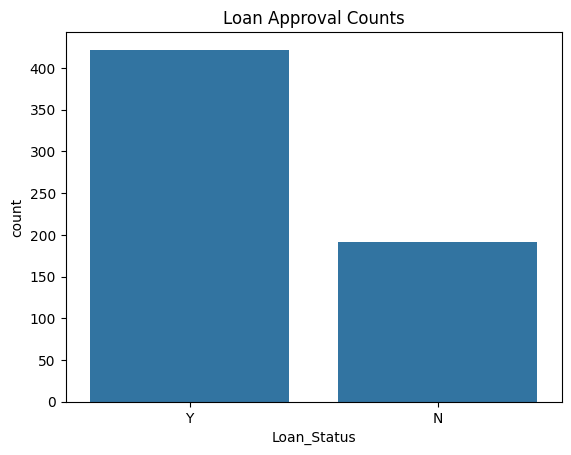

In [112]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Counts')
plt.show()


In [113]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])


In [114]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
         'ApplicantIncome', 'CoapplicantIncome',
         'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Map to binary form


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [116]:
scaler = StandardScaler()
X_train[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']] = scaler.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']])
X_test[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']] = scaler.transform(X_test[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']])


In [117]:
# Removing rows with NaN values in X_train
X_train_clean = X_train.dropna()

# Also removing corresponding rows in y_train to keep data aligned
y_train_clean = y_train[X_train_clean.index]

# Removing rows with NaN values in X_test
X_test_clean = X_test.dropna()

# Also removing corresponding rows in y_test to keep data aligned
y_test_clean = y_test[X_test_clean.index]

In [118]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_clean, y_train_clean)
rf_prediction = rf_classifier.predict(X_test_clean)
rf_accuracy = metrics.accuracy_score(y_test_clean, rf_prediction)
print("Accuracy of Random Forest:", rf_accuracy)


Accuracy of Random Forest: 0.5


In [119]:

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_clean, y_train_clean)
nb_prediction = nb_classifier.predict(X_test_clean)
nb_accuracy = metrics.accuracy_score(y_test_clean, nb_prediction)
print("Accuracy of GaussianNB:", nb_accuracy)


Accuracy of GaussianNB: 0.6


In [120]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_clean, y_train_clean)
dt_prediction = dt_classifier.predict(X_test_clean)
dt_accuracy = metrics.accuracy_score(y_test_clean, dt_prediction)
print("Accuracy of Decision Tree:", dt_accuracy)



Accuracy of Decision Tree: 0.6


In [121]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train_clean, y_train_clean)
kn_prediction = kn_classifier.predict(X_test_clean)
kn_accuracy = metrics.accuracy_score(y_test_clean, kn_prediction)
print("Accuracy of K-Nearest Neighbors:", kn_accuracy)



Accuracy of K-Nearest Neighbors: 0.4


In [122]:
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"K-Nearest Neighbors Accuracy: {kn_accuracy * 100:.2f}%")


Random Forest Accuracy: 50.00%
Naive Bayes Accuracy: 60.00%
Decision Tree Accuracy: 60.00%
K-Nearest Neighbors Accuracy: 40.00%


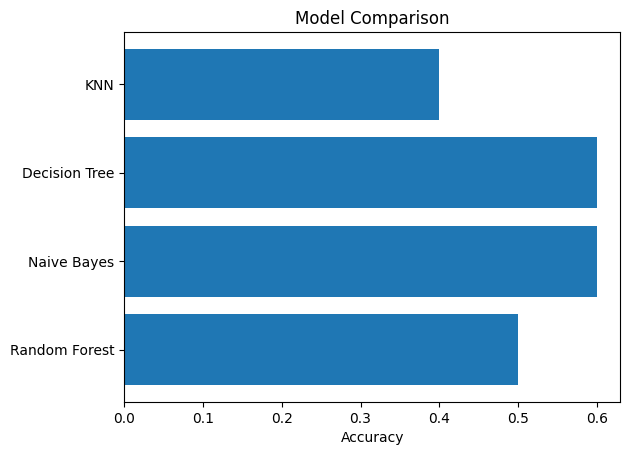

In [123]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'KNN']
accuracies = [rf_accuracy, nb_accuracy, dt_accuracy, kn_accuracy]

plt.barh(models, accuracies)
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

